# **Grocery Store Sales Prediction - Linear Regression (Ridge/Lasso)**

-----------------------------
## **Context**
-----------------------------

Grocery store sales can depend on a variety of factors. Now, with the collection of large amounts of data, these factors can be used to better understand and model future sales. This is an important step to understand future demands and can help with inventory management. Understanding what certain properties play can help improve their sales

In this workbook, we will analyze grocery store data and build a linear regression model, including:

- **Linear Regression**: Use numerical and categorical variables to build a plain ordinary least squares linear regression model
- **Ridge regression**: A regularized version of linear regression which applied a squared penalty to the size of the X coefficients
- **Lasso regression**: A regularized version of linear regression which applies an absolute value penalty to the size of the X coefficients. It also alows the slope to go to 0 (in essence, reducing the number of X variables)

-----------------------------
## **Dataset** 
-----------------------------

- Item_Identifier : Unique product ID

- Item_Weight : Weight of the product

- Item_Fat_Content : Whether the product is low fat or not

- Item_Visibility : The % of the total display area of all products in a store allocated to the particular product

- Item_Type : The category to which the product belongs

- Item_MRP : Maximum Retail Price (list price) of the product

- Outlet_Identifier : Unique store ID

- Outlet_Establishment_Year : The year in which the store was established

- Outlet_Size : The size of the store in terms of ground area covered

- Outlet_Location_Type : The type of city in which the store is located

- Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket

- Item_Outlet_Sales : Sales of the product in the particular store. This is the outcome variable to be predicted.

## **Step 1 - Importing the libraries and initial inspection of data**

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [55]:
# Loading both train and test datasets

train_df = pd.read_csv('/Users/guransingh/Library/CloudStorage/OneDrive-Personal/Documents/Work/Python Notebooks/Python Notebooks/MIT/BigMartSales_Regression/bigMartSales.csv')

test_df = pd.read_csv('/Users/guransingh/Library/CloudStorage/OneDrive-Personal/Documents/Work/Python Notebooks/Python Notebooks/MIT/BigMartSales_Regression/BM_Test.csv')

In [56]:
#check head
train_df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [57]:
#check shape
train_df.shape

(8523, 12)

In [58]:
#check info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [59]:
#count number of null values
train_df.isnull().sum()/train_df.shape[0]

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

Some significant missing values in weight and outlet size

In [60]:
#split into categorical and numerical variables
num_list=[]
cat_list=[]

for col in train_df.columns:
    if train_df[col].dtype=='O':
        cat_list.append(col)
    else:
        num_list.append(col)

In [61]:
df_num=train_df[num_list]
df_cat=train_df[cat_list]

In [62]:
df_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [63]:
df_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


## Step 2 - EDA on numerical variables

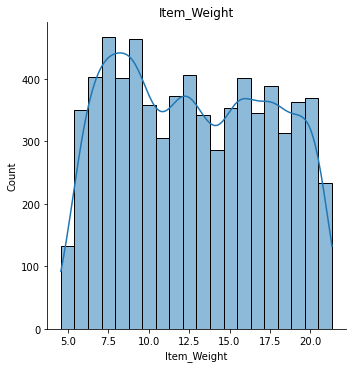

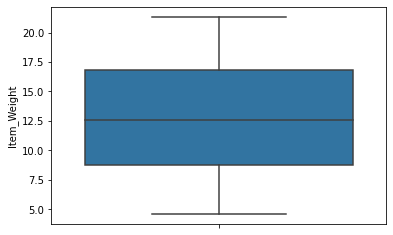

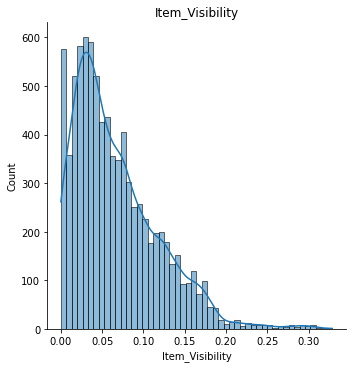

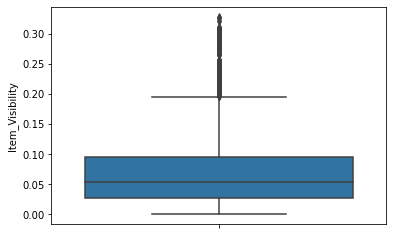

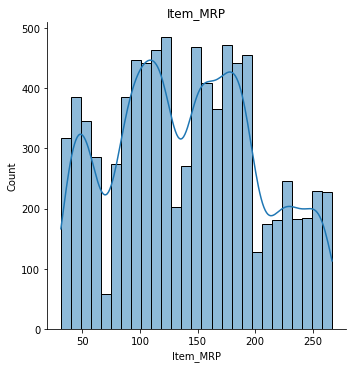

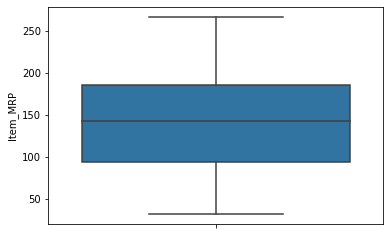

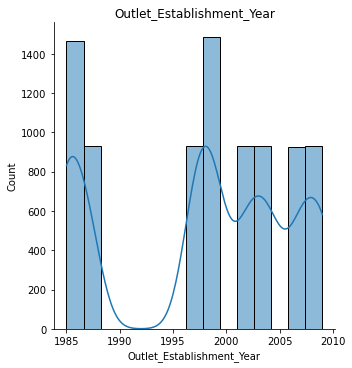

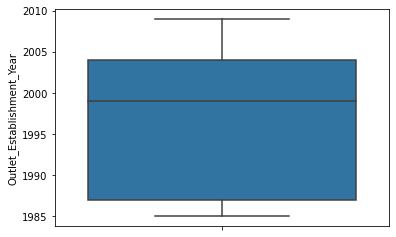

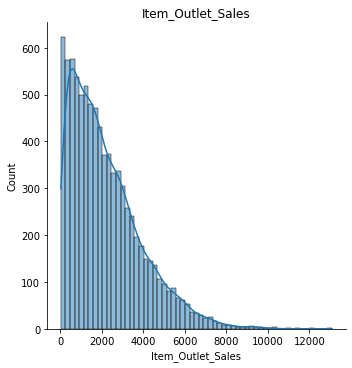

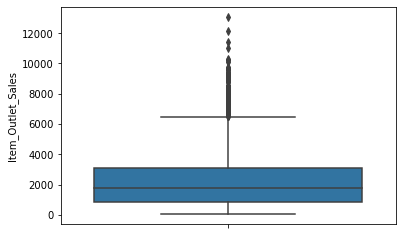

In [64]:
for col in df_num.columns:
    sns.displot(df_num[col], kde=True)
    plt.title(col)
    plt.show()
    sns.boxplot(y=df_num[col])
    plt.show()

In [65]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


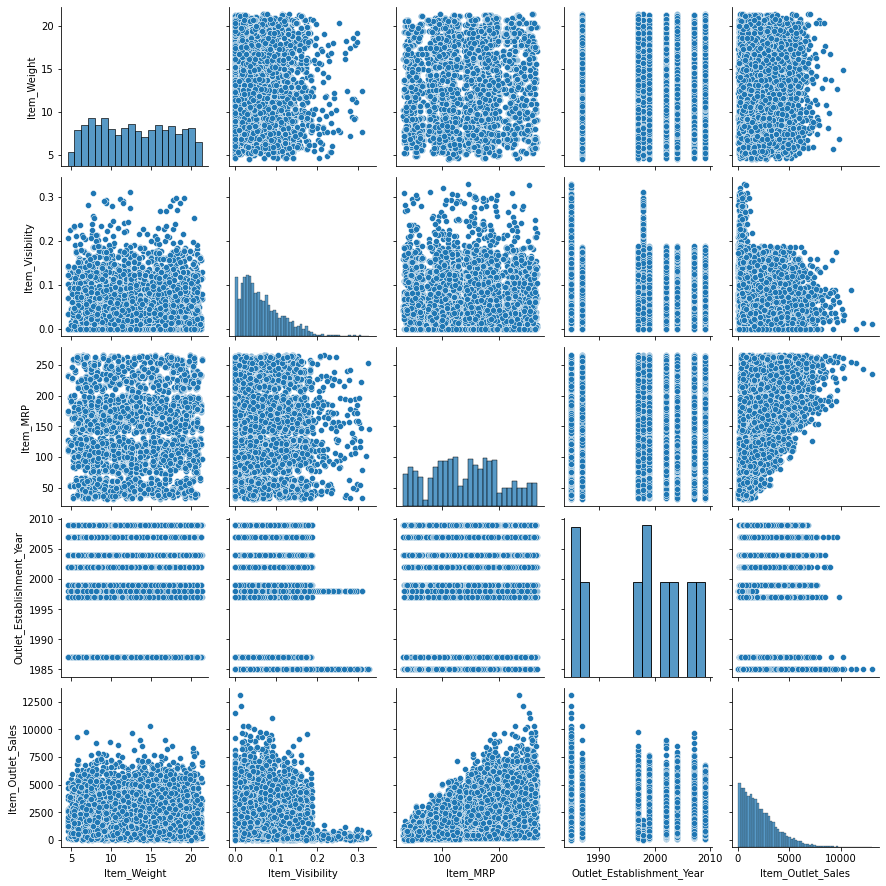

In [66]:
sns.pairplot(df_num)

In [67]:
df_num.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

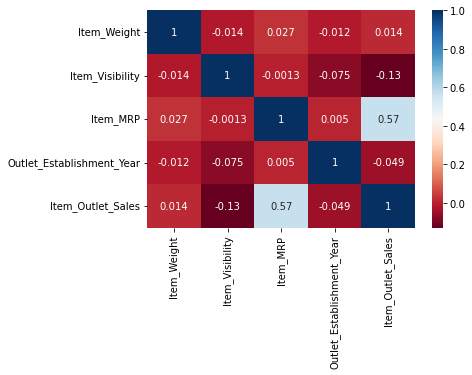

In [68]:
sns.heatmap(df_num.corr(), annot=True, cmap='RdBu')

## Step 3 - EDA on Categorical variables

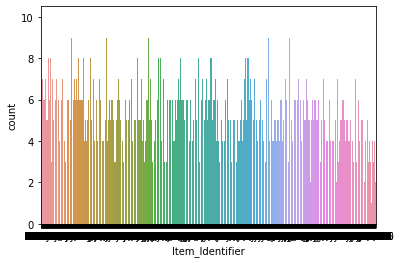

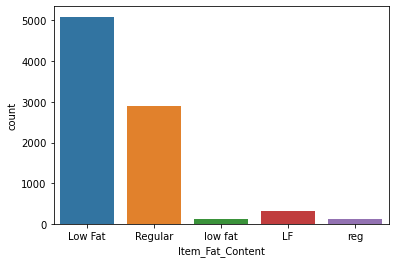

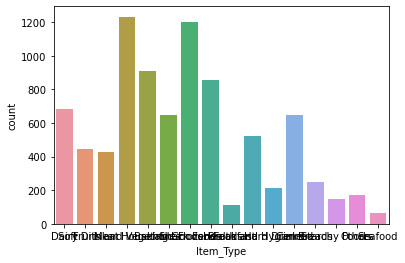

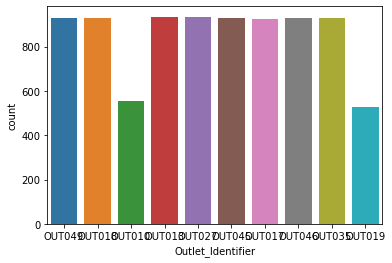

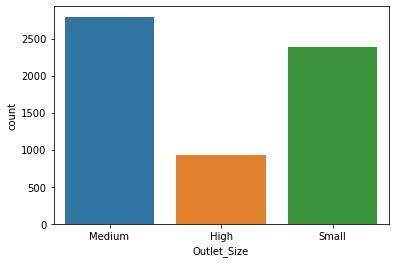

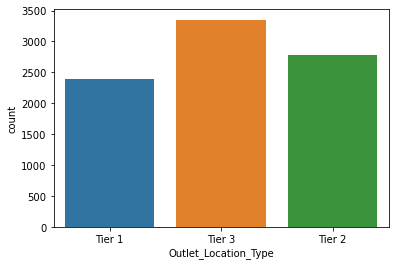

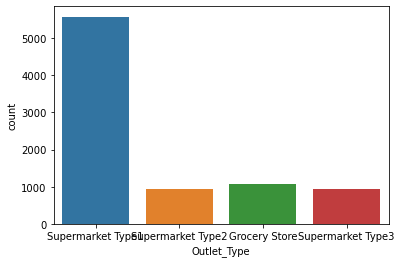

In [69]:
for col in df_cat.columns:
    sns.countplot(df_cat[col])
    plt.show()

In [70]:
#drop item identifier

df_cat.drop(['Item_Identifier'], inplace=True, axis=1)


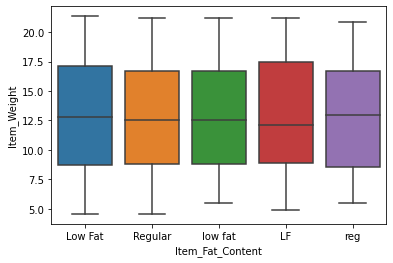

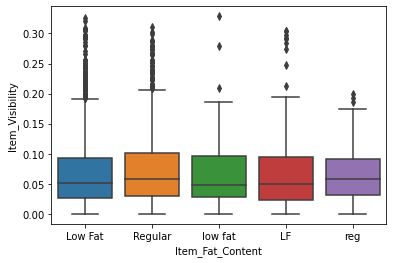

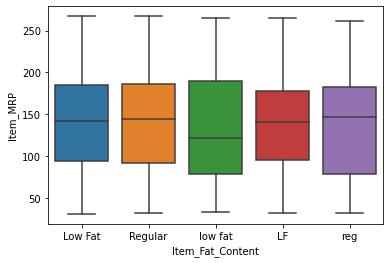

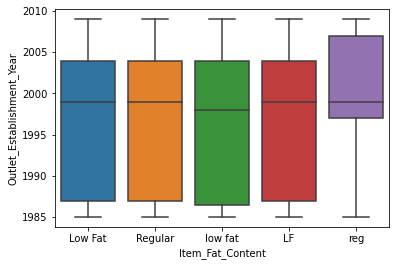

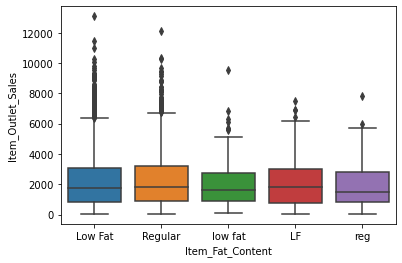

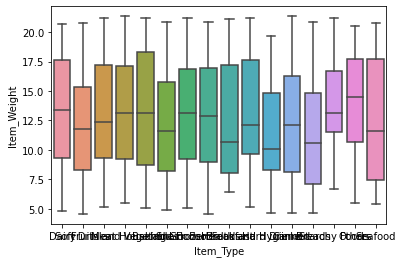

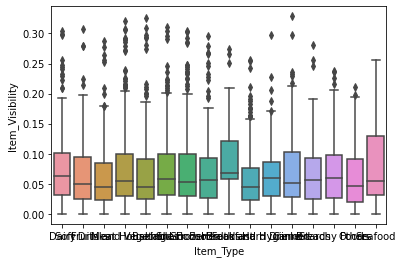

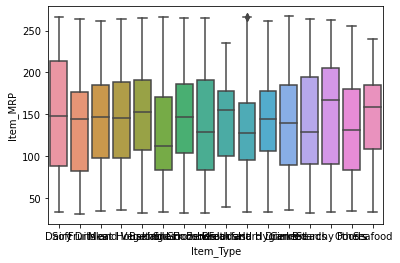

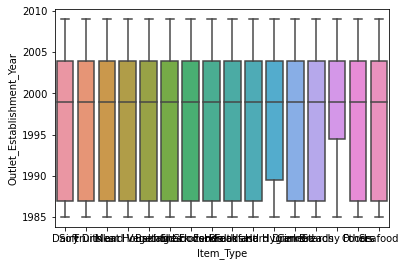

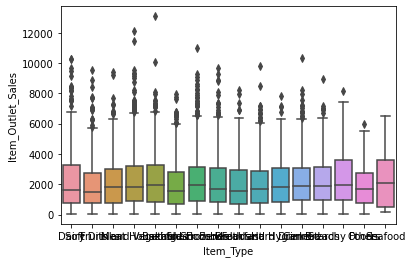

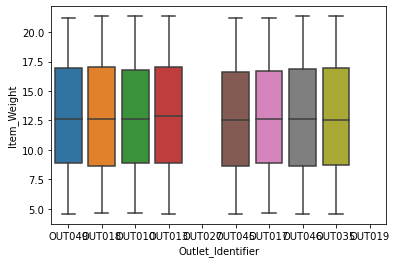

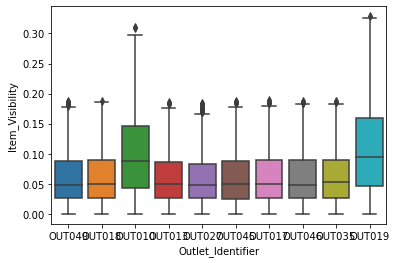

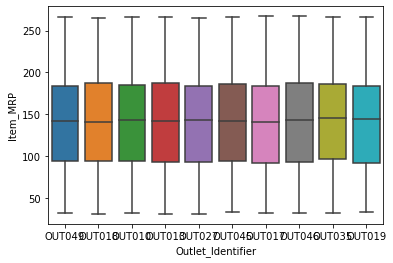

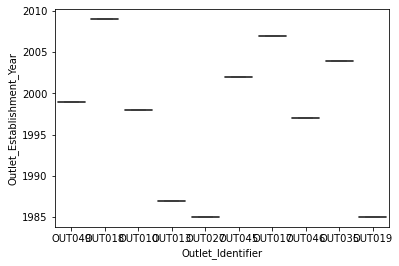

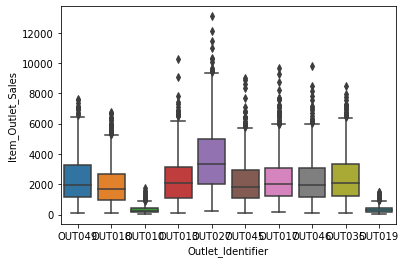

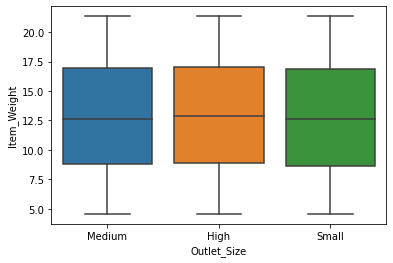

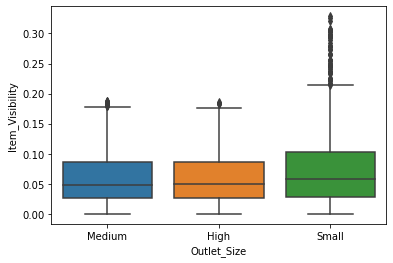

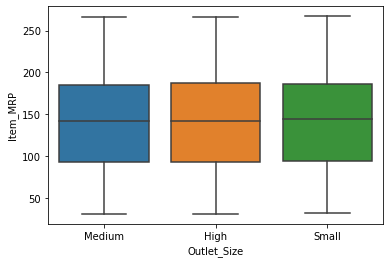

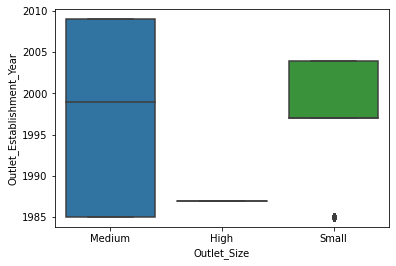

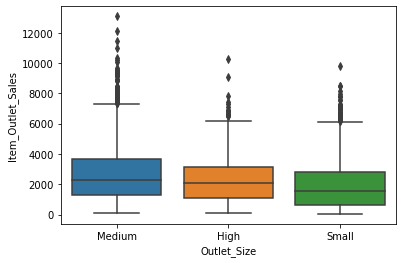

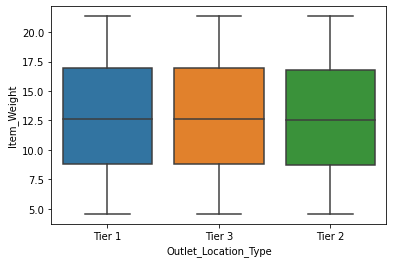

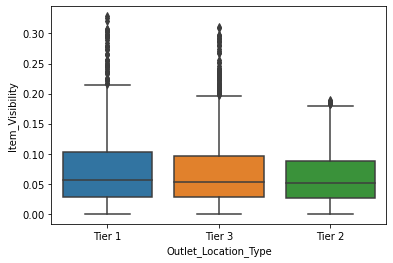

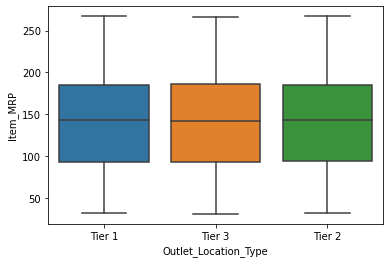

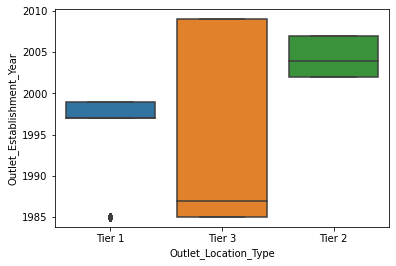

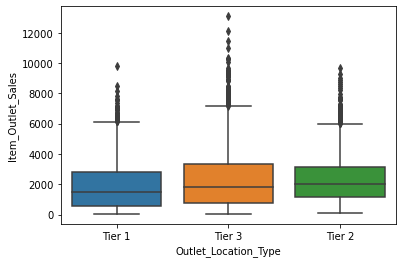

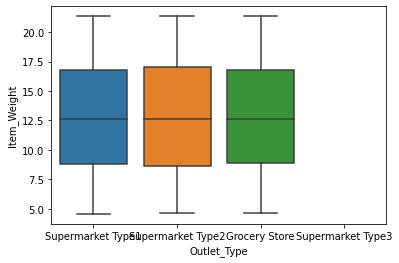

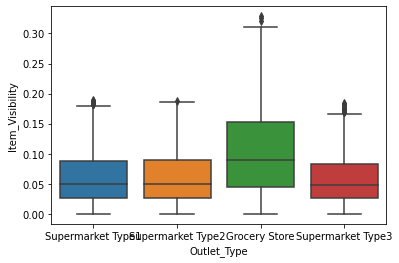

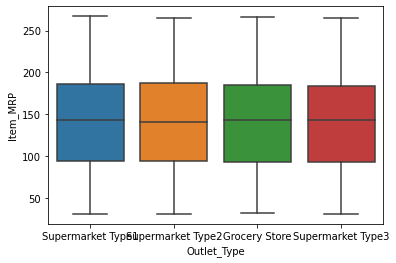

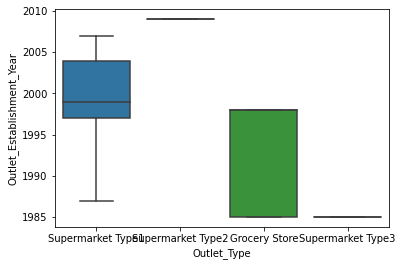

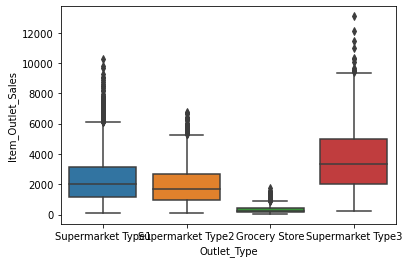

In [71]:
for i in df_cat.columns:
    for j in df_num.columns:
        sns.boxplot(x=df_cat[i],y=df_num[j])
        plt.show()

## Step 4 - Data pre-processing

In [72]:
#fix the error in item fat content.
train_df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [73]:
#Have to replace LF, Low fat and Reg
train_df.Item_Fat_Content.replace('LF','Low Fat', inplace=True)
train_df.Item_Fat_Content.replace('reg','Regular', inplace=True)
train_df.Item_Fat_Content.replace('low fat','Low Fat', inplace=True)

In [74]:
#check if it works
train_df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### **Missing Value Treatment**

In [75]:
#first column to look at is item weight
train_df.Item_Weight.isnull().sum()

1463

In [76]:
#fill these with the median of 12.6
train_df.Item_Weight=train_df.Item_Weight.fillna(12.6)
test_df.Item_Weight=test_df.Item_Weight.fillna(12.6)

In [77]:
train_df.Item_Weight.isnull().sum()

0

In [78]:
outlet_size_data = train_df[train_df['Outlet_Size'].notnull()]

outlet_size_missing_data = train_df[train_df['Outlet_Size'].isnull()]

Now, we are creating a cross-tab of all the above categorical variables against the column **Outlet_Size**, where we want to impute the missing values.

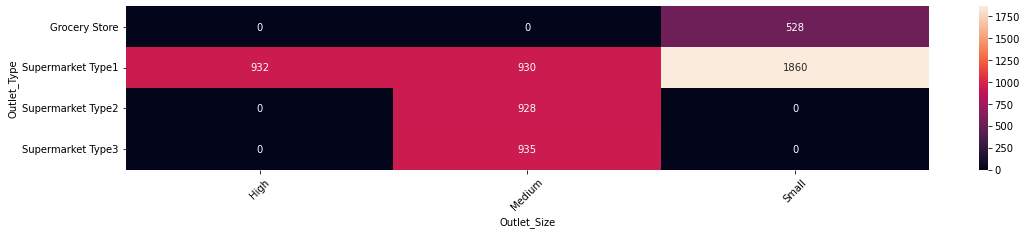

In [79]:
fig= plt.figure(figsize = (18, 3))

sns.heatmap(pd.crosstab(index = outlet_size_data['Outlet_Type'], columns = outlet_size_data['Outlet_Size']), annot = True, fmt = 'g')

plt.xticks(rotation = 45);

**Observations:** 

- We observe from the above heatmap that all the grocery stores have **Outlet_Size** as small.
- All the Supermarket Type 2 and Supermarket Type 3 have **Outlet_Size** as Medium.

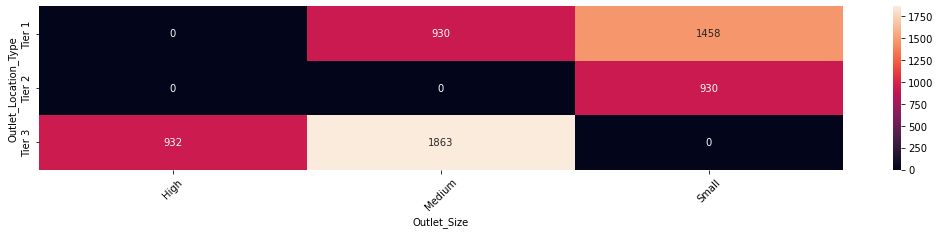

In [80]:
fig = plt.figure(figsize = (18, 3))

sns.heatmap(pd.crosstab(index = outlet_size_data['Outlet_Location_Type'], columns = outlet_size_data['Outlet_Size']), annot = True, fmt = 'g')

plt.xticks(rotation = 45);

**Observation:**

- We observe from the above heatmap that all the Tier 2 stores have **Outlet_Size** as Small.

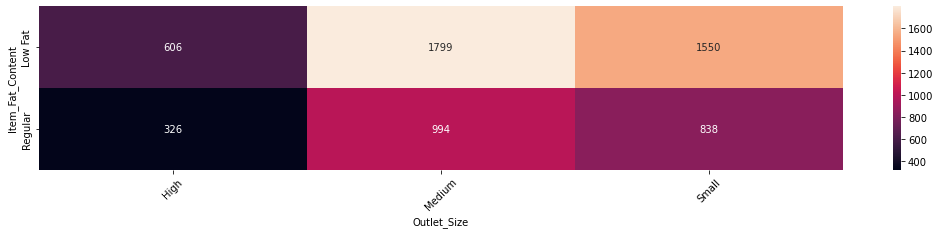

In [81]:
fig = plt.figure(figsize = (18, 3))

sns.heatmap(pd.crosstab(index = outlet_size_data['Item_Fat_Content'], columns = outlet_size_data['Outlet_Size']), annot = True, fmt = 'g')

plt.xticks(rotation = 45);

**Observation:**

- There does not seem to be any clear pattern between the variables **Item_Fat_Content** and **Outlet_Size**.

Now, we will use the patterns we have from the variables **Outlet_Type** and **Outlet_Location_Type** to impute the missing values for the column **Outlet_Size**.

Below, we are identifying the indices in the DataFrame where **Outlet_Size** is null/missing and **Outlet_Type** is Grocery Store, so that we can replace those missing values with the value Small based on the pattern we have identified in above visualizations. Similarly, we are also identifying the indices in the DataFrame where **Outlet_Size** is null/missing and **Outlet_Location_Type** is Tier 2, to impute those missing values.

In [82]:
grocery_store_indices = train_df[train_df['Outlet_Size'].isnull()].query(" Outlet_Type == 'Grocery Store' ").index

tier_2_indices = train_df[train_df['Outlet_Size'].isnull()].query(" Outlet_Location_Type == 'Tier 2' ").index

Now, we are updating those indices for the column **Outlet_Size** with the value Small.

In [83]:
train_df.loc[grocery_store_indices, 'Outlet_Size'] = 'Small'

train_df.loc[tier_2_indices, 'Outlet_Size'] = 'Small'

Performing the same transformations on the **test** dataset.

In [84]:
grocery_store_indices = test_df[test_df['Outlet_Size'].isnull()].query(" Outlet_Type == 'Grocery Store' ").index

tier_2_indices = test_df[test_df['Outlet_Size'].isnull()].query(" Outlet_Location_Type == 'Tier 2' ").index

In [85]:
test_df.loc[grocery_store_indices, 'Outlet_Size'] = 'Small'

test_df.loc[tier_2_indices, 'Outlet_Size'] = 'Small'

After we have imputed the missing values, let's check again if we still have missing values in both train and test datasets. 

In [86]:
train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [87]:
test_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

There are **no missing values** in the datasets.

## **Step 5 - Feature Engineering**

For time date based data, convert it to numeric. Here we are replacing the 'year' with age of the outlet

In [88]:
train_df['Outlet_Age'] = 2013 - train_df['Outlet_Establishment_Year']

test_df['Outlet_Age'] = 2013 - test_df['Outlet_Establishment_Year']

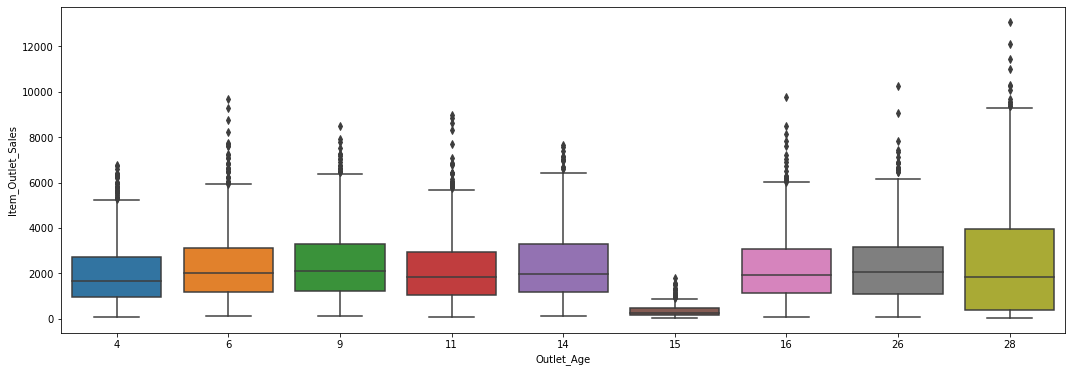

In [89]:
fig = plt.figure(figsize = (18, 6))

sns.boxplot(x = 'Outlet_Age', y = 'Item_Outlet_Sales', data = train_df);

## **Step 6 - Build Linear Regression Model**

In [90]:
# We are removing the outcome variable from the feature set Also removing the variable Outlet_Establishment_Year, as we have created a new variable Outlet_Age
train_features = train_df.drop(['Item_Outlet_Sales', 'Outlet_Establishment_Year'], axis = 1)

# And then we are extracting the outcome variable separately
train_target = train_df['Item_Outlet_Sales']

We cannot use categorical data. Convert categorical data to numeric by getting dummy variables (one-hot encoding)

In [91]:
# Creating dummy variables for the categorical variables
train_features = pd.get_dummies(train_features, drop_first = True)

train_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,14,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,4,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,14,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,15,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,8.93,0.000000,53.8614,26,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


Now lets scale the dataset using min-max scaler. We could also use standard scaler

In [93]:
# Creating an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Applying fit_transform on the training features data
train_features_scaled = scaler.fit_transform(train_features)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
train_features_scaled = pd.DataFrame(train_features_scaled, index = train_features.index, columns = train_features.columns)

train_features_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.048866,0.927507,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.081274,0.058705,0.072068,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.770765,0.051037,0.468288,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.871986,0.000000,0.640093,0.458333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.260494,0.000000,0.095805,0.916667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [94]:
# Adding the intercept term
train_features_scaled = sm.add_constant(train_features_scaled)

# Calling the OLS algorithm on the train features and the target variable
ols_model_0 = sm.OLS(train_target, train_features_scaled)

# Fitting the Model
ols_res_0 = ols_model_0.fit()

print(ols_res_0.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     7.987
Date:                Mon, 02 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:56:06   Log-Likelihood:                -71130.
No. Observations:                8523   AIC:                         1.454e+05
Df Residuals:                    6952   BIC:                         1.565e+05
Df Model:                        1570                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

**Observations:**

- We can see that the R2 for the model is 0.563. 
- Not all the variables are statistically significant to predict the outcome variable (large P values)

## **Step 7 - Addressing Multicollinearity**

### **Removing Multicollinearity**


* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent.

* Variance Inflation factor:  Variance inflation factor measures the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. 

* If VIF is 1, then there is no correlation between the kth predictor and the remaining predictor variables, and hence the variance of β̂k is not inflated at all. Whereas, if VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeds 10, it shows signs of high multicollinearity.

* Regularization techniques like ridge and lasso can also be used when there is high multicollinearity observed
* This will be covered in the next version of this workbook

## **Step 8 - Evaluation Metrics**

### **R-Squared**

The R-squared metric gives us an indication that how good/bad our model is from a baseline model. Here, we have explained ~98% variance in the data as compared to the baseline model when there is no independent variable.

In [98]:
print(ols_res_0.rsquared)

0.6433237154838327


### **Mean Squared Error**

This metric measures the average of the squares of the errors, i.e., the average squared difference between the estimated values and the actual value.

In [63]:
print(ols_res_7.mse_resid)

0.29009080646817975


### **Root Mean Squared Error**

This metric is the same as the above but, instead of simply taking the average, we also take the square root of MSE to get RMSE. This helps to get the metric in the same unit as the target variable.

In [99]:
print(np.sqrt(ols_res_0.mse_resid))

1128.3899124717193
